In [73]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib .pyplot as plt 
import warnings
warnings.filterwarnings("ignore") 

In [44]:
df = pd.read_csv('hotel_bookings 2.csv')

In [45]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [46]:
df.shape

(119390, 32)

In [47]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [49]:
if 'reservation_status_date' in df.columns:
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
    missing_dates = df['reservation_status_date'].isna().sum()
    if missing_dates > 0:
        print(f"Number of invalid dates: {missing_dates}")
        # Optionally handle missing values
        # df.dropna(subset=['reservation_status_date'], inplace=True)  # Drop rows with invalid dates
else:
    print("Column 'reservation_status_date' does not exist in DataFrame")

Number of invalid dates: 72423


In [50]:
df_cleaned = df.dropna(subset=['reservation_status_date'])

In [51]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [53]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [54]:
df.drop(['company','agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [55]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [56]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776
mean,0.380345,102.144219,2016.142659,27.125299,12.877437,0.932316,2.506285,1.873076,0.102211,0.008273,0.030635,0.096374,0.135005,0.209531,1.627822,101.747121,0.061784,0.574846,2016-07-30 02:43:02.247306240
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,27.000000,9.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,159.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.100000,0.000000,1.000000,2017-03-04 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,25.000000,68.000000,20.000000,259.000000,510.000000,3.000000,5.000000,2017-12-09 00:00:00
std,0.485477,102.191260,0.723538,13.663305,10.101704,0.989412,1.911009,0.650838,0.398456,0.091288,0.172330,0.740802,1.510430,0.620846,13.717929,47.452396,0.242534,0.790726,NaN


In [57]:
df = df[df['adr']<5000]

is_canceled
0    0.619655
1    0.380345
Name: proportion, dtype: float64


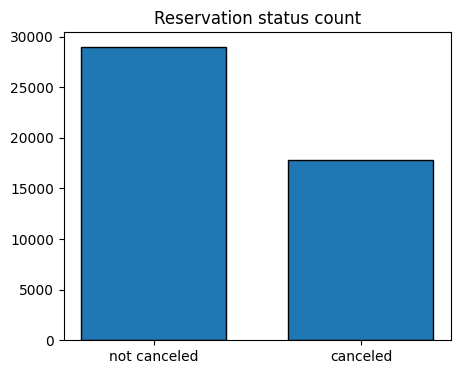

In [58]:
canceled_perc = df['is_canceled']. value_counts(normalize = True)
print(canceled_perc)
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['not canceled','canceled'],df['is_canceled'].value_counts(), edgecolor ='k', width = 0.7 )
plt.show()

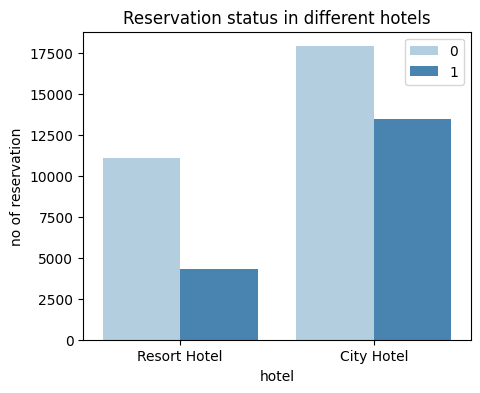

In [59]:
plt.figure(figsize = (5,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df , palette = 'Blues')
legend_label = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation status in different hotels')
plt.xlabel('hotel')
plt.ylabel('no of reservation')
plt.show()           

In [60]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.720195
1    0.279805
Name: proportion, dtype: float64

In [61]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.570428
1    0.429572
Name: proportion, dtype: float64

In [62]:
 resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
 city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

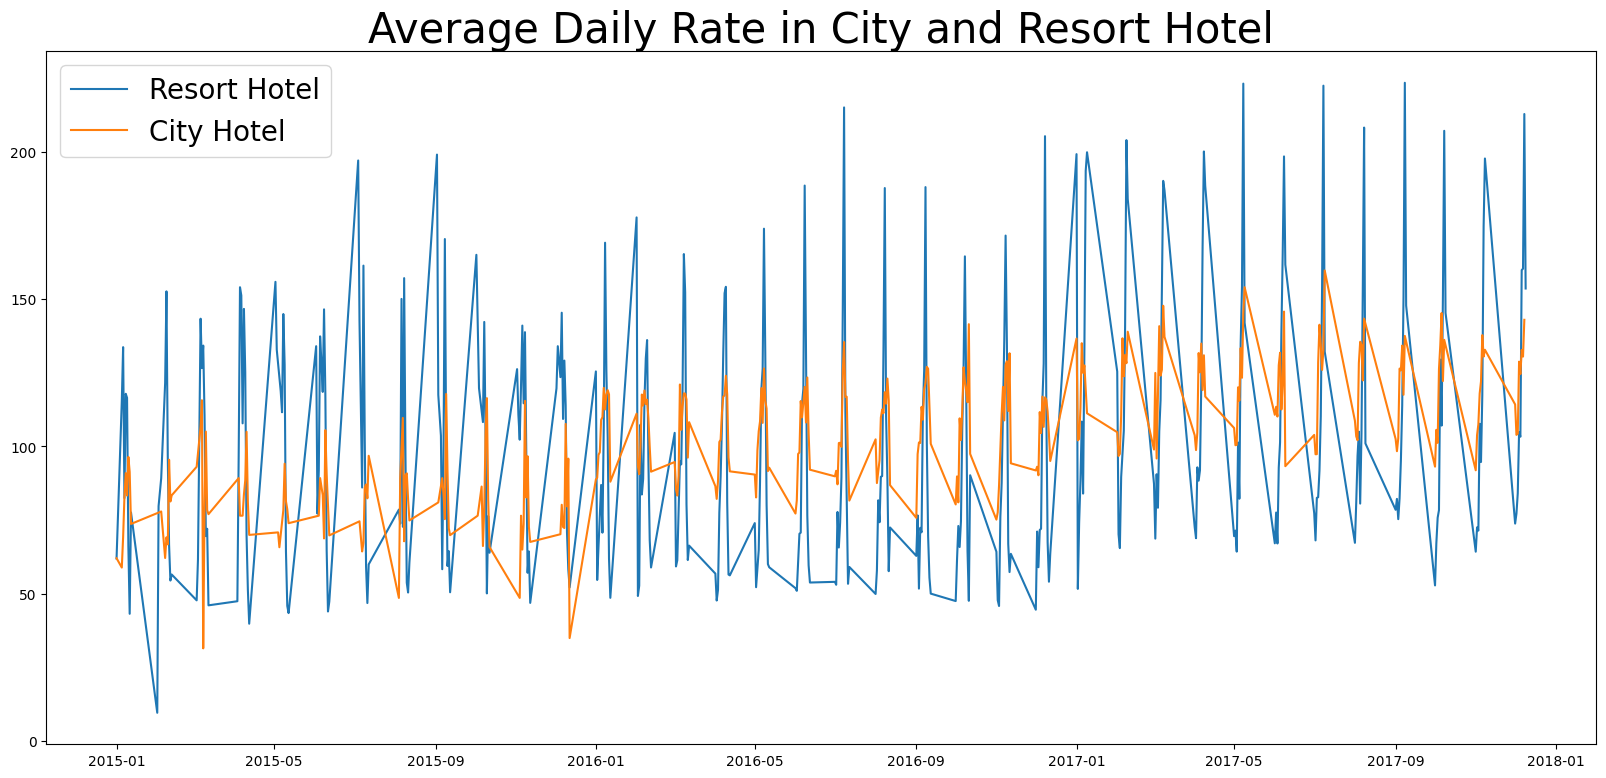

In [63]:
plt.figure(figsize = (20,9))
plt.title('Average Daily Rate in City and Resort Hotel' , fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'],label = 'City Hotel ')
plt.legend (fontsize = 20)
plt.show()

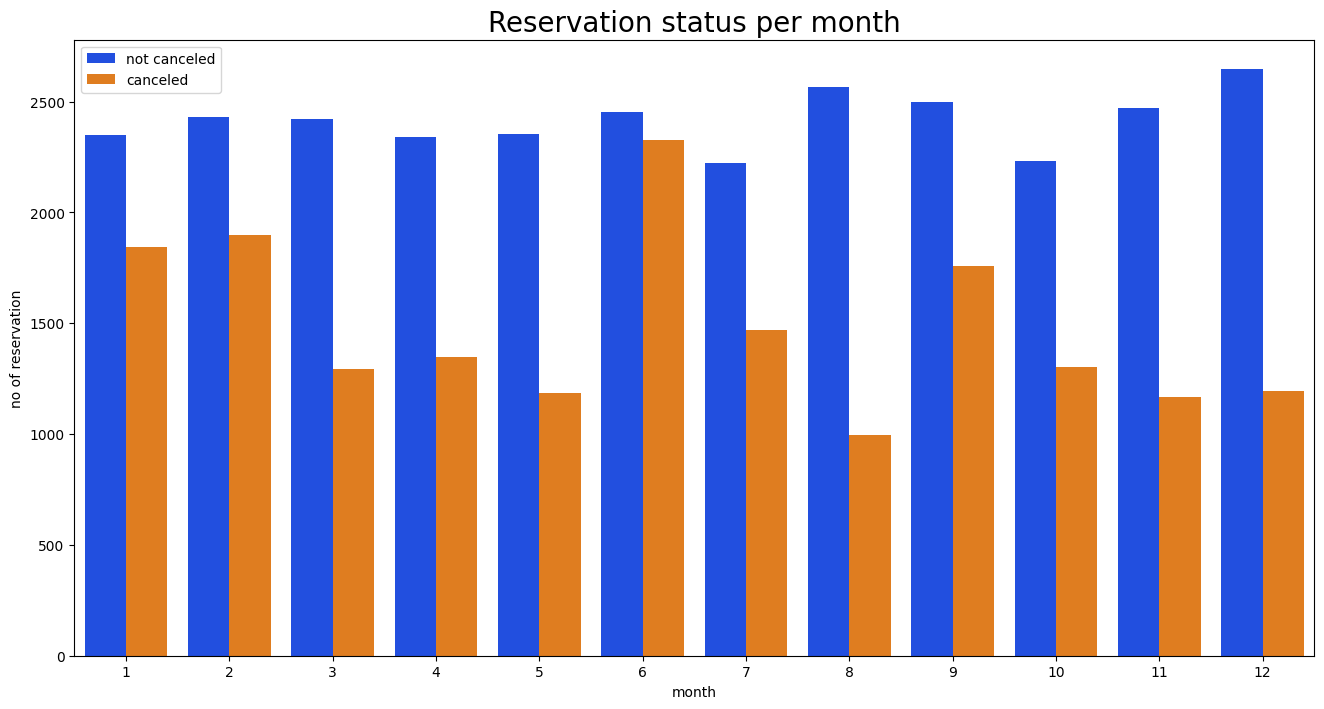

In [64]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df , palette = 'bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('no of reservation')
plt.legend(['not canceled', 'canceled'])
plt.show()    

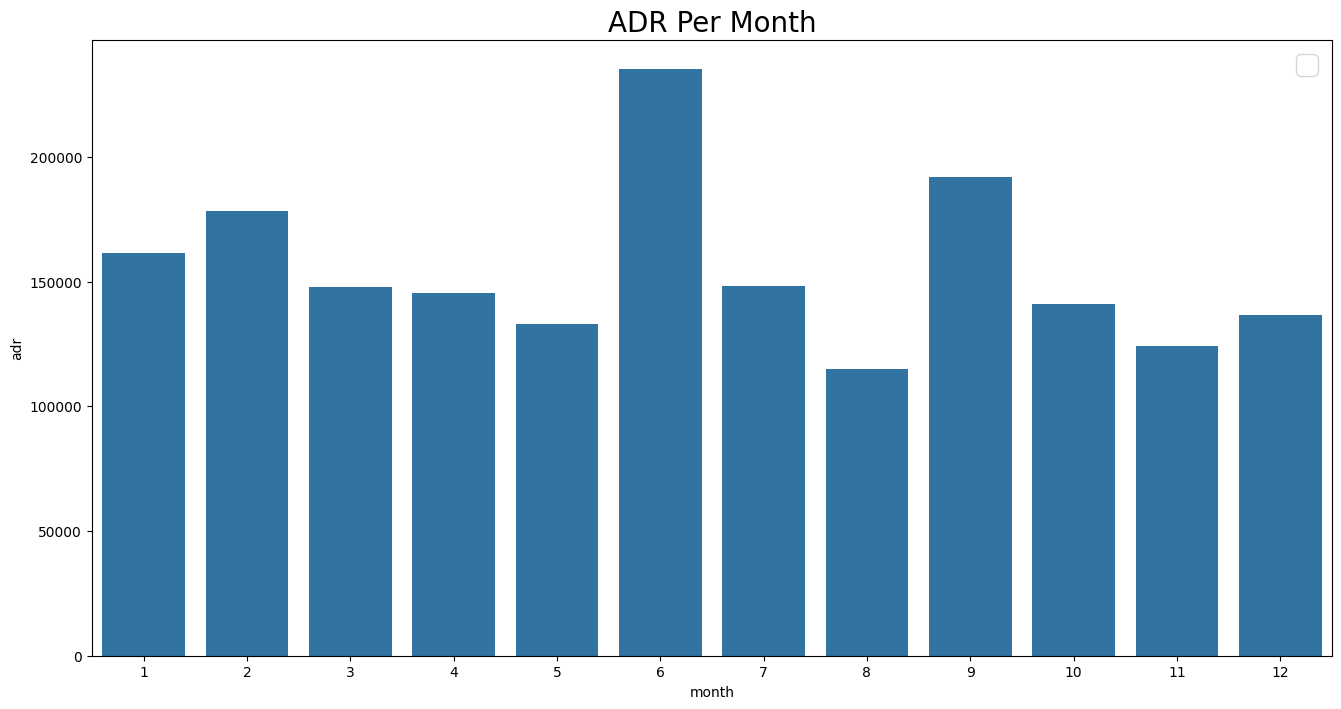

In [65]:
plt.figure(figsize = (16,8))
plt.title('ADR Per Month', size = 20)
sns.barplot(x='month', y='adr', data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index())

plt.legend(fontsize =20)
plt.show()

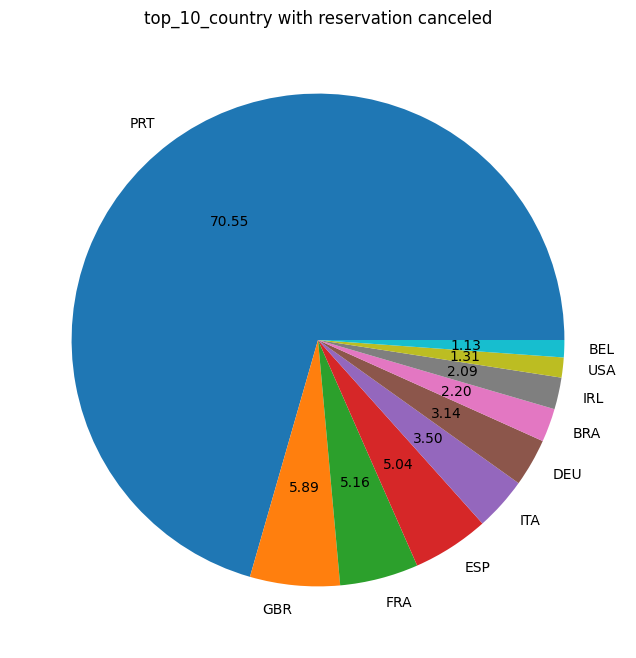

In [66]:
cancelled_data =  df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('top_10_country with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [67]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.478643
Offline TA/TO    0.200872
Groups           0.165427
Direct           0.105097
Corporate        0.041859
Complementary    0.006221
Aviation         0.001881
Name: proportion, dtype: float64

In [69]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.462706
Groups           0.279973
Offline TA/TO    0.185824
Direct           0.041144
Corporate        0.026699
Complementary    0.001967
Aviation         0.001686
Name: proportion, dtype: float64

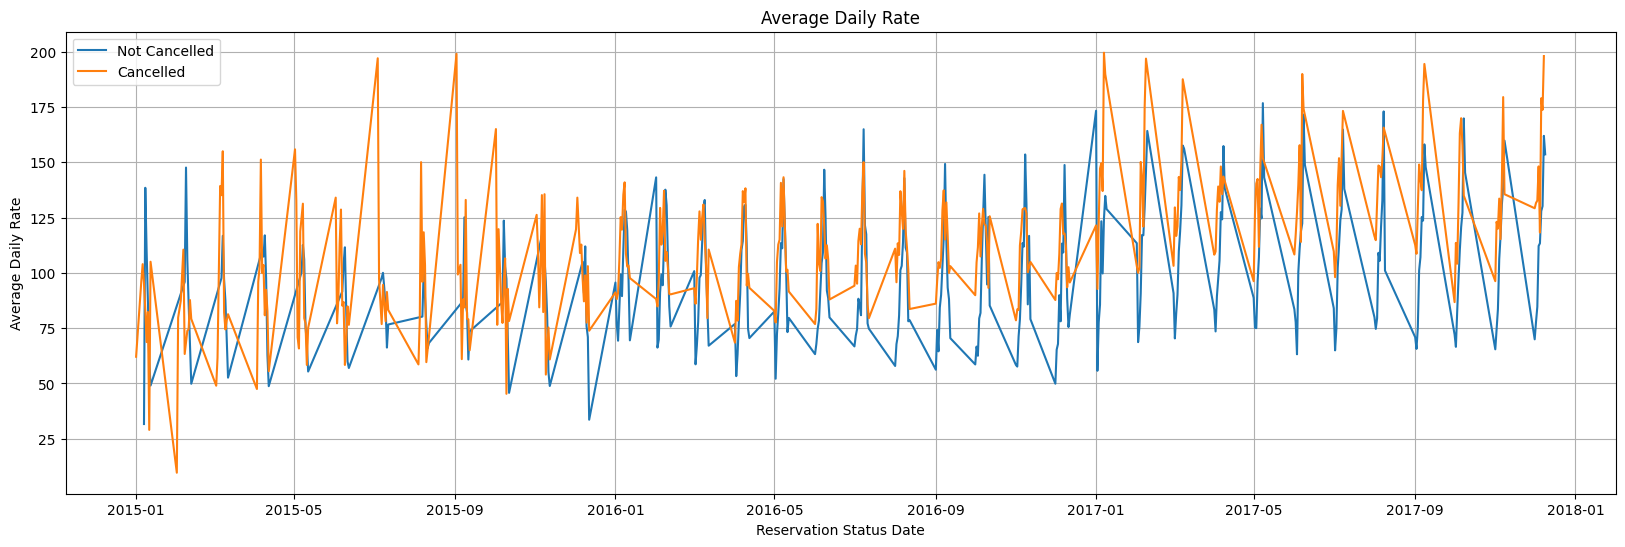

In [70]:
# Calculate average daily rate for cancelled reservations
cancelled_data = df[df['is_canceled'] == 1]
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Calculate average daily rate for not cancelled reservations
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Plot the data
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate')
plt.grid(True)
plt.show()

In [71]:
cancelled_df_adr = cancelled_df_adr[cancelled_df_adr['reservation_status_date'] > '2016-01-01']
not_cancelled_df_adr = not_cancelled_df_adr[not_cancelled_df_adr['reservation_status_date'] > '2016-01-01']

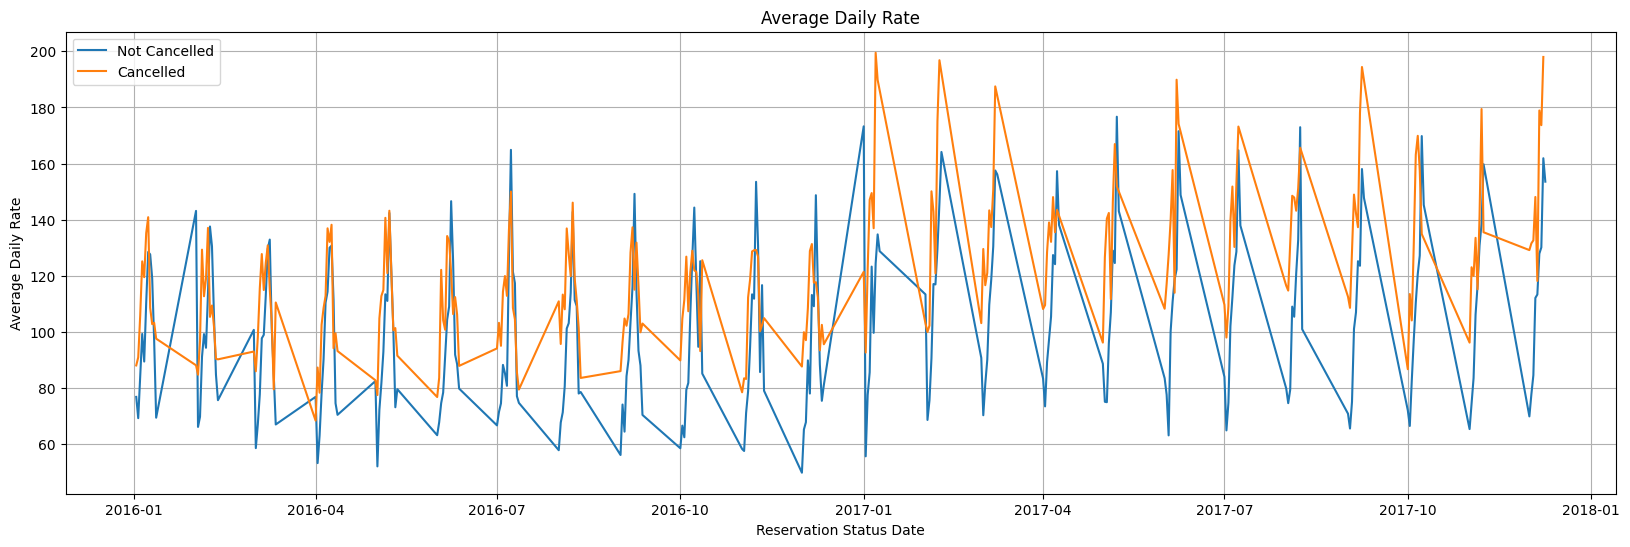

In [72]:
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate')
plt.grid(True)
plt.show()